## Rouabah Dalil, M2 IMSD, Décembre 2019
# Clustering - Prédiction de l'occurence de crime aux États-Unis

#### Introduction

Ce projet consiste en la prédiction de l'occurence de crime aux États-Unis, sur la base du jeu de données "Communities and Crimes" disponible sur UCI (https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) et Kaggle.
Le jeu de données est composé de 1994 instances définies par 128 variables, dont une correspondant à l'occurence de crimes, soit encore la variable à prédire.

Parmi les 127 variables prédictives, on supprimera les cinq premières qui n'ont pas de valeur prédictives, comme indiqué dans la description fournie sur UCI. De plus, selon cette dernière, on sait que toutes les variables sont quantitatives et comprises entre 0 et 1.

Ce projet a pour but la création d'un modèle de prédiction du score "ViolentCrimesPerPop" par régression sur forêt aléatoire. Après une analyse exploratoire puis un prétraitement des données, on se proposera de trouver le modèle minimisant l'erreur obtenue (on précisera à ce moment la métrique d'erreur utilisée).

On définit ci-dessous les packages utilisés pour la réalisation de ce projet.

In [1]:
pip install pydot

In [0]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import pandas as pd # Module d'import et manipulation des données
import numpy as np
import seaborn as sns # Modules de visualisation des données
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Modules permettant la construction et l'évaluation du modèle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import roc_curve
#Modules permettant la visualisation d'arbres composant la forêt
from sklearn.tree import export_graphviz
import pydot


### Analyse exploratoire et prétraitement des données

Procédons par l'import des données. On notera, avec la visualisation préliminaire fournie sur Kaggle, que les valeurs manquantes sont indiquées par des "?", ce qui doit être mentionné lors de l'import ci-dessous:

In [3]:
path_to_file = 'C:/Users/DalilR/Desktop/Clustering/Communities.csv'

#df = pd.read_csv(path_to_file,header=None,na_values="?")

df = pd.read_csv('/content/communities.data',header=None,na_values="?")
#La commande ci-dessus sert en cas d'utilisation de l'outil Colab : un simple import du fichier .csv suffit et cette commande procèdera à l'import automatiquement.

hd = ['state','county','community','communityname','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ','RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','ViolentCrimesPerPop']
df.columns = hd

df.head()

state  county  ...  PolicBudgPerPop ViolentCrimesPerPop
0      8     NaN  ...             0.14                0.20
1     53     NaN  ...              NaN                0.67
2     24     NaN  ...              NaN                0.43
3     34     5.0  ...              NaN                0.12
4     42    95.0  ...              NaN                0.03

[5 rows x 128 columns]

In [4]:
df.shape

(1994, 128)

In [5]:
df.describe()

state      county  ...  PolicBudgPerPop  ViolentCrimesPerPop
count  1994.000000  820.000000  ...       319.000000          1994.000000
mean     28.683551   58.826829  ...         0.195078             0.237979
std      16.397553  126.420560  ...         0.164718             0.232985
min       1.000000    1.000000  ...         0.000000             0.000000
25%      12.000000    9.000000  ...         0.110000             0.070000
50%      34.000000   23.000000  ...         0.150000             0.150000
75%      42.000000   59.500000  ...         0.220000             0.330000
max      56.000000  840.000000  ...         1.000000             1.000000

[8 rows x 127 columns]

On remarque déjà une quantité non négligeable de valeurs manquantes. De plus, à la vue des dimensions du jeu de données, il sera difficile d'avoir le contrôle sur ces valeurs. Nous allons donc afficher les colonnes contenant les valeurs manquantes, et décider par la suite de la démarche à adopter, en fonction de la quantité de valeurs manquantes qu'elles contiennent.

De plus, à la vue des variables, on remarque qu'elles sont normalisées mais pas standardisées. Cela peut éventuellement altérer le résultat. On va donc dans un premier temps procéder sans standardiser les données, puis, ultérieurement, en fonction des résultats, nous y procéderons ou non.

In [6]:
nulls = df.isnull().sum()
print(nulls[nulls>0])
print('On a', len(nulls[nulls>0]), 'colonnes à valeurs manquantes')

county                  1174
community               1177
OtherPerCap                1
LemasSwornFT            1675
LemasSwFTPerPop         1675
LemasSwFTFieldOps       1675
LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
LemasTotReqPerPop       1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
dtype: int64
On a 25 colonnes à valeurs manquantes


24 des 25 colonnes à valeurs manquantes contiennent plus de 50% de NaN. On va donc supprimer ces colonnes du jeu de données.

Pour la colonne restante, qui ne contient qu'une valeur manquante, on peut soit supprimer l'instance correspondant à la valeur manquante, ou remplacer celle-ci par la moyenne de la colonne concernée. Ces deux options ayant un impact relativement négligeable sur le résultat final, on peut en choisir une sans critère particulier. Ici, on opte pour la seconde option.

On va, par la même occasion, définir les données X et y qui serviront plus tard à l'élaboration du modèle.

In [0]:
ft_to_drop = nulls[nulls>0]

df2 = df.dropna(axis=1,subset=ft_to_drop)

y = df2['ViolentCrimesPerPop']
X = df2.drop(['ViolentCrimesPerPop', 'communityname','state','fold'],axis=1)
X.fillna(X['OtherPerCap'].mean(),inplace=True)

##### Visualisation des données

Commençons par visualiser la répartition de la variable à prédire.

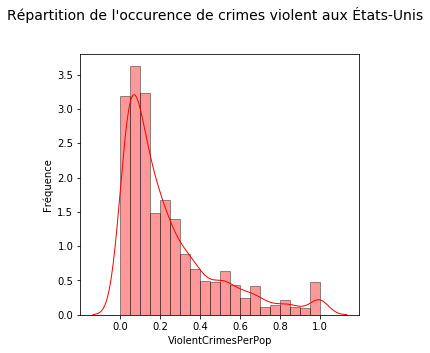

In [8]:
fig = plt.figure(figsize = (5,5))
title = fig.suptitle("Répartition de l'occurence de crimes violent aux États-Unis", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1);
ax.set_xlabel('ViolentCrimesPerPop');
ax.set_ylabel("Fréquence") ;
sns.distplot(df['ViolentCrimesPerPop'], hist=True, kde=True, 
             bins=int(20), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
                                    

On remarque déjà un important déséquilibre dans la répartition de cette variable.

---

Affichons maintenant la heatmap des corrélations.

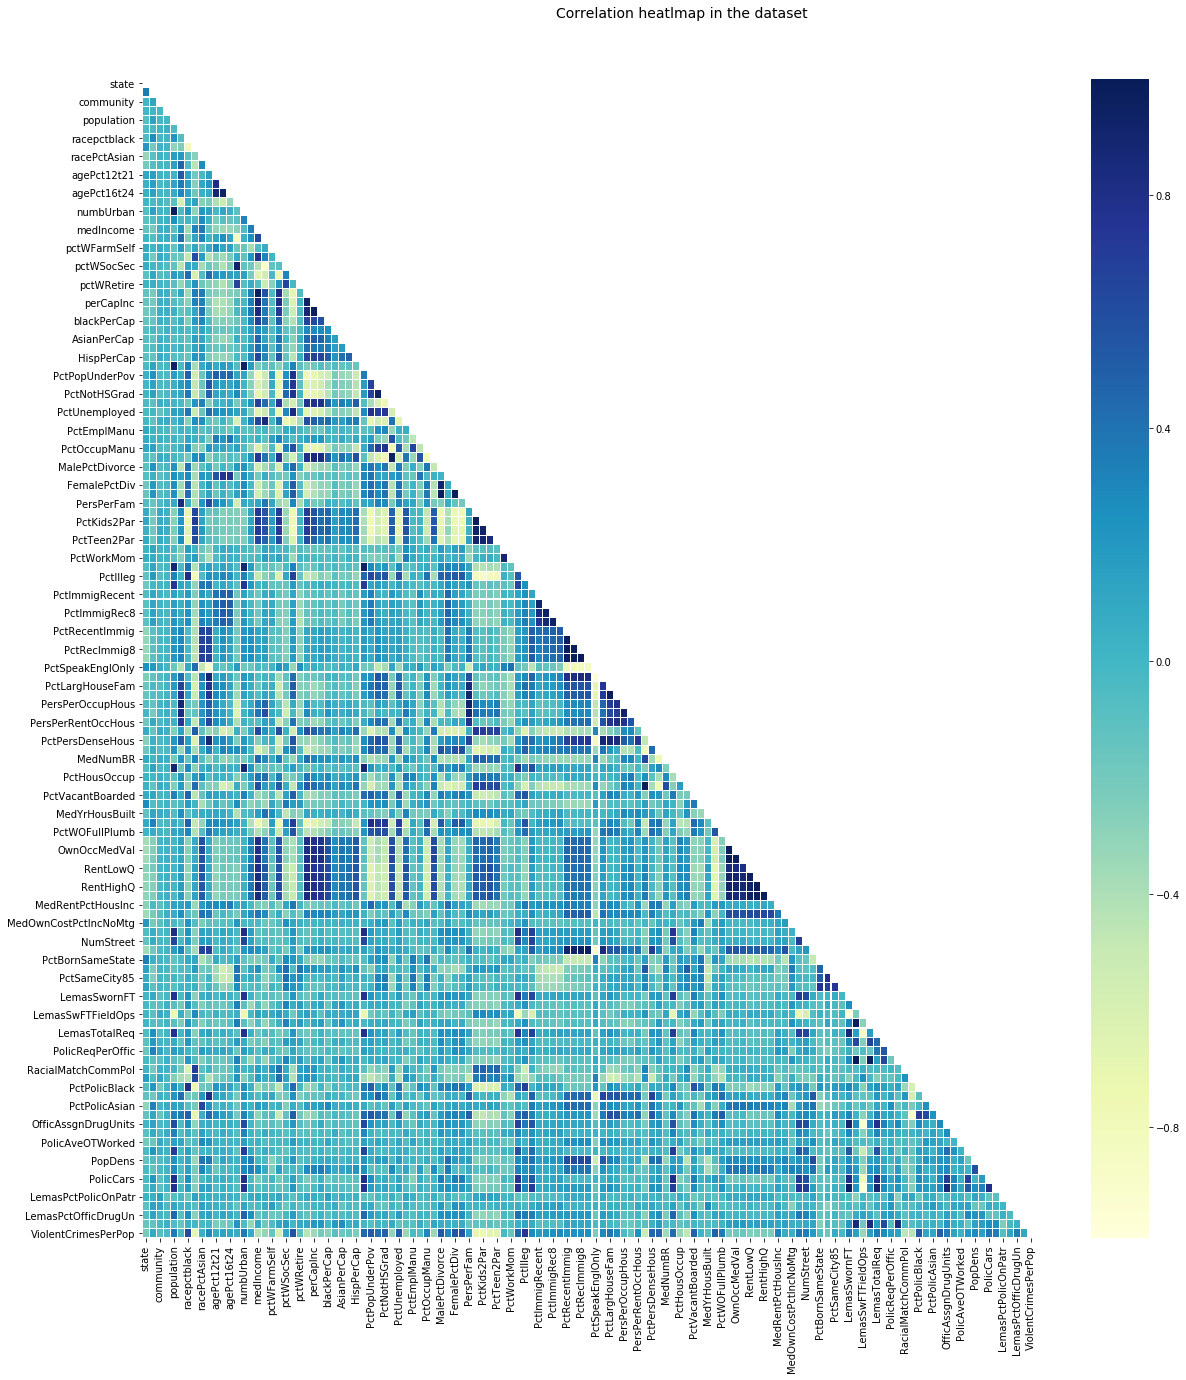

In [9]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(round(corr,2), mask=mask, annot=False, ax=ax, cmap="YlGnBu",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation heatlmap in the dataset', fontsize=14)

Compte tenu des dimensions élevées du jeu de données, il est difficile d'extraire des informations intéressantes de cette matrice des corrélations. Il est cependant intéressant de constater que l'on peut l'afficher et voir malgré tout une forte corrélation entre l'occurence des crimes violents et le pourcentage d'enfants étant dans un foyer avec leurs deux parents, ou encore le pourcentage d'enfants nés sans que leurs parents se soient mariés.

Voyons de plus près quelles variables sont très corrélées à la variable à prédire (i.e celles dont le coefficient de corrélation est supérieur à 0.5 en valeur absolue).

In [10]:
correlations = abs(corr['ViolentCrimesPerPop'])
var_int = correlations[correlations>0.5]
print(var_int)

racepctblack           0.631264
racePctWhite           0.684770
pctWInvInc             0.576324
pctWPubAsst            0.574665
PctPopUnderPov         0.521877
PctUnemployed          0.504235
MalePctDivorce         0.525407
FemalePctDiv           0.556032
TotalPctDiv            0.552777
PctFam2Par             0.706667
PctKids2Par            0.738424
PctYoungKids2Par       0.666059
PctTeen2Par            0.661582
PctIlleg               0.737957
PctPersOwnOccup        0.525491
PctPolicBlack          0.543545
ViolentCrimesPerPop    1.000000
Name: ViolentCrimesPerPop, dtype: float64


Un nombre relativement élevé de variables est fortement corrélé à l'occurence de crimes violents. Voyons si l'on peut extraire d'autres informations par la visualisation des données, en visualisant plus particulièrement certaines variables très corrélées.

---

Il sera question ici de séparer le jeu de données en deux : une partie constituée d'instances présentant une faible occurence de crimes violents, l'autre partie constituée d'instances faisant l'objet d'une forte occurence de crimes violents. On veut observer le comportement de ces deux parties par rapport à certaines variables. Évidemment, on ne pourra pas réitérer cela pour toutes les variables.

Commençons par le rapport à la variable définissant le revenu médian par foyer.

In [11]:
dfhi = df[df['ViolentCrimesPerPop']>=0.75] # Instances à fort taux de criminalité 
dflo = df[df['ViolentCrimesPerPop']<=0.25] # Instances à faible taux de criminalité

print(dfhi['medIncome'].describe(), dflo['medIncome'].describe())

count    104.000000
mean       0.205096
std        0.113000
min        0.000000
25%        0.137500
50%        0.180000
75%        0.252500
max        1.000000
Name: medIncome, dtype: float64 count    1341.000000
mean        0.418001
std         0.218510
min         0.020000
25%         0.240000
50%         0.390000
75%         0.550000
max         1.000000
Name: medIncome, dtype: float64


On remarque déjà une différence significative de revenus entre les deux "populations". Passons à la visualisation pour confirmer cette tendance.

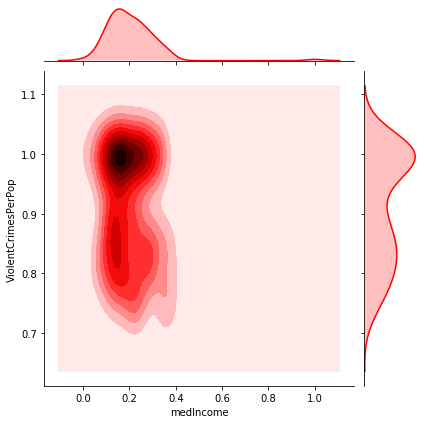

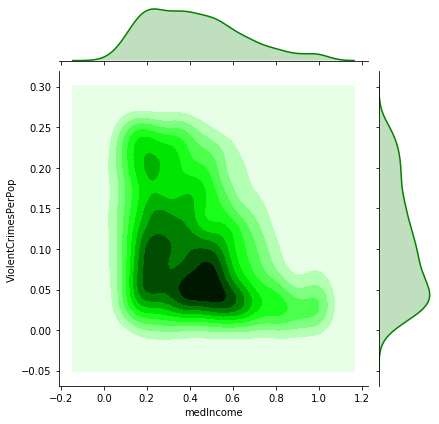

In [12]:
sns.jointplot(x=dfhi['medIncome'], y=dfhi['ViolentCrimesPerPop'],kind='kde',color='red')
sns.jointplot(x=dflo['medIncome'], y=dflo['ViolentCrimesPerPop'],kind='kde', color='green')

Tendance confirmée : on voit bien que les instances présentant une forte criminalité ont un salaire très restreint, contrairement aux autres, dont la moyenne est également deux fois plus élevée.

Nous avons vu précédemment une forte corrélation entre le pourcentage d'enfants étant dans un foyer avec deux parents. Voyons si, par la visualisation, nous arrivons à comprendre cette corrélation.

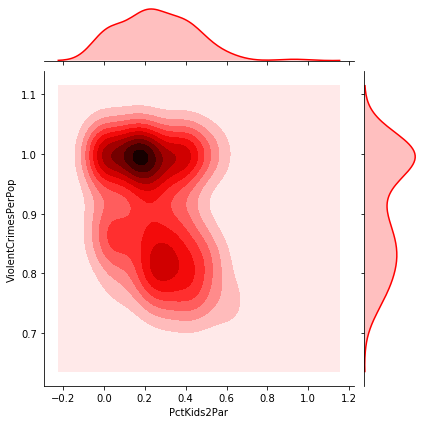

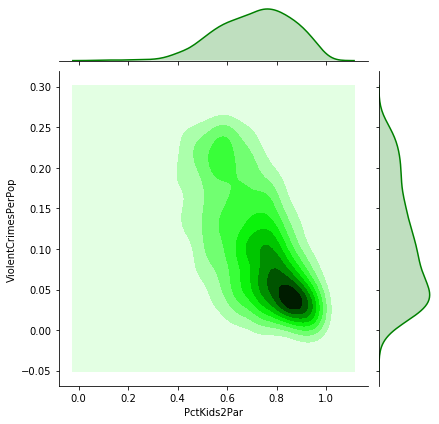

In [13]:
sns.jointplot(x=dfhi['PctKids2Par'], y=dfhi['ViolentCrimesPerPop'],kind='kde',color='red')
sns.jointplot(x=dflo['PctKids2Par'], y=dflo['ViolentCrimesPerPop'],kind='kde', color='green')

De la même manière ici, on voit une différence significative de répartition d'enfants élevés dans un foyer de deux parents : les instances les plus 'violentes' ont tendance à observer une valeur basse pour cette variable, et inversement pour les instances moins 'violentes'.

Il est important de remarquer cependant que la corrélation n'a pas la valeur d'une implication : en effet, il est possible qu'une forte criminalité fasse 'fuir' des familles qui étaient installées. Autrement dit, la proportion d'enfants élevés par deux parents peut aussi bien être une conséquence d'une ciminalité élevée.

### Régression par Forêt Aléatoire

Nous allons maintenant procéder à la création d'un modèle de régression par forêt aléatoire, et évaluer ce modèle par la suite.

La difficulté principale réside dans le choix des paramètres pour lesquels on opte. En effet, il existe une multitude de combinaisons de paramètres, et un choix s'imposera entre l'interprétabilité et l'erreur. De plus, choisir manuellement les paramètres optimaux peut s'avérer être fastidieux - on va préférer des méthodes automatisées retournant l'erreur pour le modèle optimal.

Définissons tout d'abord la fonction qui permettra l'affichage et la sauvegarde d'un arbre composant la forêt que l'on aura au préalable modélisée, permettant d'exporter au format .png un arbre extrait de la forêt, permettant une visualisation en outre.

In [0]:
def save_arbre(modele):
    feature_list = list(X.columns)
    arbre = modele.estimators_[3]
    export_graphviz(arbre, out_file = 'arbre.dot', feature_names = feature_list, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file('arbre.dot')

    graph.write_png('arbre.png');
    print('Succès')

Définissons maintenant un premier modèle, et évaluons-le en utilisant la métrique d'erreur moyenne absolue négative (neg MAE), obtenue par la somme des erreurs de prédiction en valeur absolue, pondérée par le nombre de prédictions. On va utiliser une cross-validation à 10 plis, et afficher l'erreur moyenne que l'on obtiendra sur ces dix plis.

Ce premier modèle est parfaitement sommaire et servira de point de départ pour la précision des paramètres.

In [15]:
premier_modele = rfr();
cross_valid_scores = cross_val_score(premier_modele, X, y, cv = 10, scoring = 'neg_mean_absolute_error');
print (cross_valid_scores.mean())

-0.09920656532663316


Avec une erreur de prédiction en moyenne égale à 0.1, on peut être relativement satisfait. Affichons un arbre obtenu dans ce modèle.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
premier_modele.fit(X_train,y_train)

save_arbre(premier_modele)

Succès


Ce premier modèle nous conduit à l'arbre suivant:

In [17]:
Image('arbre_long.png', width=1200, height=400)

Le modèle est relativement précis, cependant à la vue d'un arbre composant la forêt, on peut se poser la question de l'interprétabilité de notre modèle. On va donc chercher à améliorer l'interprétabilité en proposant des arbres plus réduits, tout en essayant de conserver une erreur aussi proche de zéro que possible.

Pour ce faire, nous pouvons utiliser la fonction GridSearchCV, qui permet une recherche exhaustive de la meilleure combinaison de paramètres (dont les valeurs possibles seront définies arbitrairement au préalable). On peut afficher par la suite les erreurs associées par validation croisée à dix plis, puis un arbre composant la forêt du modèle final retenu.

On définit la fonction ci-dessous, qui retournera le modèle final ainsi que les scores associés.

In [0]:
def rfr_model(X, y):
    # Entrée : X et y les données, et la variable à prédire
    # Sortie : Le modèle retenu et les scores associés par validation croisée 
    gsc = GridSearchCV(
        estimator=rfr(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (10, 50, 100, 500), 'max_leaf_nodes':(2,3,5,7)
        },
        cv=10, scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X,y)
    best_params = grid_result.best_params_
    
    rf_r = rfr(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], verbose=False, max_leaf_nodes=best_params['max_leaf_nodes']
                                                                                                                                                          , random_state=False)
    scores = cross_val_score(rf_r, X, y, cv=10, scoring='neg_mean_absolute_error')

    return rf_r, scores

#modele_final, scores_finaux = rfr_model(X,y)
#modele_final.fit(X_train, y_train)

Cette fonction est très coûteuse en temps (elle exécute un modèle, puis une validation croisée, et ce un très grand nombre de fois), c'est pour cela que l'on définit le modèle directement via les paramètres retenus lors d'une première exécution : profondeur maximale 7, 50 estimateurs (i.e 50 arbres dans la forêt), et un maximum de 7 feuilles par noeud.
On laisse cependant la fonction disponible si le lecteur désire l'exécuter.


Définissons ci-dessous le modèle que l'on qualifiera de 'final', et évaluons-le en utilisant trois métriques.

In [19]:
modele_final = rfr(max_depth=7, n_estimators=50, max_leaf_nodes=7, random_state=1)
modele_final.fit(X_train, y_train)
y_predit = modele_final.predict(X_test)
save_arbre(modele_final);

print('Score R²: %.4f' % r2(y_test,y_predit))
print('Erreur quadratique moyenne : %.4f' % mse(y_test,y_predit))
print('Erreur absolue moyenne : %.4f' % mae(y_test,y_predit))

Succès
Score R²: 0.6209
Erreur quadratique moyenne : 0.0185
Erreur absolue moyenne : 0.0968


On observe au passage une très légère hausse de l'erreur moyenne, de l'ordre de 0.003.

Regardons un arbre de la forêt "finale", afin de juger de son interprétabilité.

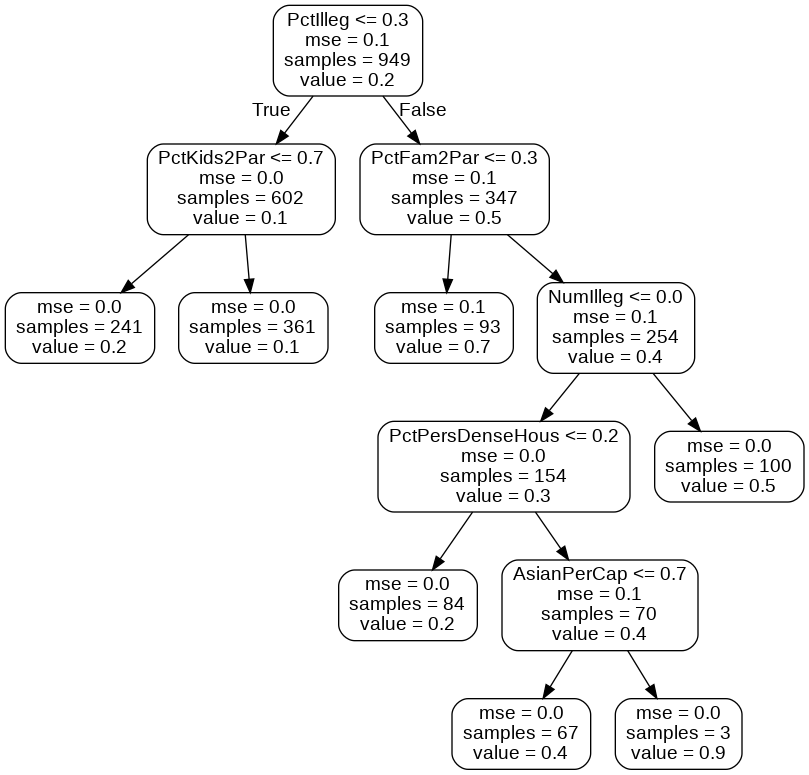

In [20]:
Image('arbre_court.png', width=800, height=400)

L'arbre ainsi obtenu présente une très grande capacité à être interprété : on a très clairement les variables explicitées ainsi que les processus de décision à chaque noeud. Cette amélioration se fait au détriment d'une variation de l'erreur moyenne qui s'avère être presque négligeable.

Remarquons tout de même que l'erreur de prédiction semble se situer au niveau des scores représentant une forte occurence de crimes violents. Cela peut notamment s'expliquer par le fait que les instances concernées par ces scores sont relativement peu représentées par rapport à celles présentant une faible criminalité.

### Importance des variables dans le modèle

On va afficher l'importance des variables dans notre modèle:

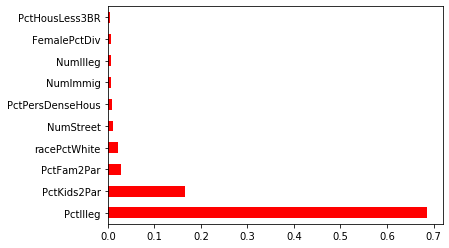

In [21]:
feat_importances = pd.Series(modele_final.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='red')

On observe ici que deux variables se distinguent fortement par leur importance : PctIlleg et PctKids2Par.
On serait tenté de construire un modèle basé uniquement sur ces variables, mais en plus d'en avoir que trop peu pour la prédiction, notre erruer ne changerait que très peu.

Optons plutôt pour une standardisation, qui permettrait éventuellement une optimisation de l'erreur de prédiction et du score R2.

## Optimisation de l'erreur par standardisation

On commence par définir les données standardisées grâce à la fonction "scale" fournie par scikit-learn.

Ensuite, le nettoyage préliminaire étant déjà effectué, nous pouvons directement passer à la construction du modèle, et l'évaluer.

Score R²: 0.6524
Erreur quadratique moyenne : 0.0208
Erreur absolue moyenne : 0.1014


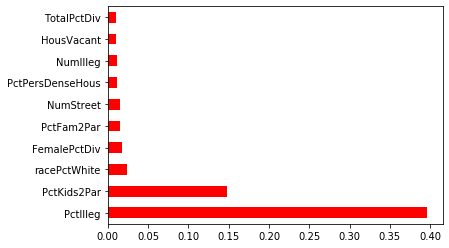

In [22]:
sc = StandardScaler()

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.25);

modele_final_scaled = rfr(n_estimators=100);
X2_train = sc.fit_transform(X2_train);
X2_test = sc.transform(X2_test);
modele_final_scaled.fit(X2_train,y2_train);

y2_predit = modele_final_scaled.predict(X2_test);

print('Score R²: %.4f' % r2(y2_test,y2_predit))
print('Erreur quadratique moyenne : %.4f' % mse(y2_test,y2_predit))
print('Erreur absolue moyenne : %.4f' % mae(y2_test,y2_predit))

feat_importances = pd.Series(modele_final_scaled.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='red')

On remarque une légère amélioration de l'erreur de prédiction du modèle, de même pour le score R2 qui avoisine 0.7. Cette amélioration reste cependant assez modeste.

L'importance des variables ne varie que très peu, ce qui laisse penser que la standardisation n'a que peu d'impact sur la construction du modèle.

## Conclusion

Cette étude a permis l'exploration de différentes manières de construire une forêt aléatoire. En effet, sans chercher à contrôler les paramètres, on peut arriver à un résultat très bon mais difficile à interpréter. À l'inverse, en contrôlant certains paramètres, notamment comme la profondeur maximale des arbres, et au détriment d'une partie (négligeable ou non, selon les modèles et les données) de la précision, on arrive à un modèle qui semble être beaucoup plus aisé d'interpréter.

Il faut cependant noter qu'une erreur de 0.1 sur un score attribué entre 0 et 1 n'est pas optimale, et ceci semble être causé par la sous-représentation (fort heureusement) des villes présentant une forte criminalité. Pour remédier à cela, une possibilité serait d'effectuer un sur-échantillonnage ou un sous-échantillonnage des instances respectivement peu ou très représentées, afin d'équilibrer le jeu de données. Cela serait possible avec une méthode de type SMOTE.

Un prérequis à l'utilisation d'une telle méthode serait de catégoriser la variable d'intérêt. Cela transformerait ce problème en un problème de classification et non plus de régression, et il faudrait également s'attendre à une perte d'information lors de l'interprétation du modèle, en fonction du nombre de classes choisies par exemple.

Une autre limite de cette étude réside dans la difficulté à visualiser efficacement le plus de variables possibles. En effet, on a vu via la heatmap des corrélations qu'il est très difficile d'en tirer une quelconque information. De façon analogue, il est également très difficile de visualiser un nombre important de variables sans surcharger l'étude, ce qui oblige à n'en sélectionner que quelques unes, au risque de passer à côté d'informations intéressantes.

Enfin, la piste à explorer serait l'amélioration de la précision et la sous-représentation des instances présentant une forte occurence de crimes violents.